# Input execl data

In [250]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sns
df=pd.read_excel("Protein_Powder_2018.xlsx")
df1=pd.read_excel("Protein_Powder_2019.xlsx")
df2=pd.read_excel("Protein_Powder _2020.xlsx")
df3=pd.read_excel("Protein_Powder _2021.xlsx")

In [251]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Show the data in 2018

In [252]:
df

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,31-Dec-2018 11:45PM,ABC7 On Your Side Year End,https://app.meltwater.com/mwTransition?url=htt...,NaN,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,NaN,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaT,2018-12-31 00:00:00,23:45:00,NaN,NaN,NaN
1,31-Dec-2018 10:00PM,Do not attempt Veganuary until you’ve read this…,http://www.nla-eclipsweb.com/service/redirecto...,NaN,NaN,The Telegraph (eClips Web),"By Flic Everett, Editor",United Kingdom,South East and London,English,...,NaN,NaN,NaN,NaN,NaT,2018-12-31 00:00:00,22:00:00,England,London,NaN
2,31-Dec-2018 08:45PM,ABC7 On Your Side Year End,https://app.meltwater.com/mwTransition?url=htt...,NaN,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,NaN,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaT,2018-12-31 00:00:00,20:45:00,NaN,NaN,NaN
3,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,NaN,NaN,NaN,Nutraceuticals World - Powered by Dow Jones,NaN,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaT,2018-12-31 00:00:00,19:00:00,NaN,NaN,NaN
4,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,NaN,NaN,NaN,The Daily Telegraph - Powered by Dow Jones,Flic Everett,United Kingdom,NaN,English,...,NaN,NaN,NaN,NaN,NaT,2018-12-31 00:00:00,19:00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7097,01-Jan-2018 04:40AM,WBEZ-FM (Radio) at January 1st 2018 3:40 AM,https://app.meltwater.com/mwTransition?url=htt...,NaN,ting I would have for breakfast mice Navy had ...,WBEZ-FM (Radio),NaN,United States,Illinois,English,...,NaN,NaN,NaN,NaN,NaT,2018-01-01 00:00:00,04:40:00,NaN,NaN,NaN
7098,01-Jan-2018 03:47AM,Healthy New You,https://www.pasomagazine.com/8734-2/,NaN,Garden of Life is made of USDA Certified organ...,PASO Magazine,PASO Magazine,United States,California,English,...,NaN,NaN,NaN,NaN,NaT,2018-01-01 00:00:00,03:47:00,California,Paso Robles,NaN
7099,01-Jan-2018 01:03AM,Veganuary 2018: 8 vegan high protein smoothies,http://www.briefreport.co.uk/news/veganuary-20...,NaN,be asked this question on more than one occasi...,Brief Report,NaN,United Kingdom,NaN,English,...,NaN,NaN,NaN,NaN,NaT,2018-01-01 00:00:00,01:03:00,NaN,NaN,NaN
7100,01-Jan-2018 01:00AM,Veganuary 2018: 8 vegan high protein smoothies,http://metro.co.uk/2018/01/01/veganuary-2018-8...,NaN,Pi?a colada shake\n\n1 cup frozen pineapple\n\...,Metro.co.uk,Mandy Mazliah,United Kingdom,South East and London,English,...,NaN,NaN,NaN,NaN,NaT,2018-01-01 00:00:00,01:00:00,England,London,NaN


# Show the data in 2019

In [253]:
df1

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,31-Dec-2019 11:33PM,The best exercise to get strong legs and a ton...,http://www.msn.com/en-ph/health/fitness/the-be...,NaN,deals: boost your performance and focus\nBest ...,MSN Philippines News,Matt Kollat,Philippines,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2019-12-31,23:33:00,NaN,NaN,NaN
1,31-Dec-2019 10:04PM,What is Veganuary & Why You Should Try it This...,http://www.eatingwell.com/article/2061958/what...,NaN,"If it's tough to get enough protein, consider ...",Eating Well,"Lainey Younkin, M.S., R.D., L.D.N.",United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2019-12-31,22:04:00,Vermont,Shelburne,NaN
2,31-Dec-2019 07:59PM,MusclePharm (OTCMKTS:MSLP) Stock Passes Below ...,https://www.thecerbatgem.com/2019/12/31/muscle...,NaN,. The company's MusclePharm brand product port...,The Cerbat Gem,Scott Moore,United States,Nebraska,English,...,NaN,NaN,NaN,NaN,NaN,2019-12-31,19:59:00,Nebraska,Omaha,NaN
3,31-Dec-2019 07:56PM,MusclePharm (OTCMKTS:MSLP) Shares Pass Below F...,https://baseballnewssource.com/2019/12/31/musc...,NaN,. The company's MusclePharm brand product port...,Baseball News Source,Chris Copeland,United States,Florida,English,...,NaN,NaN,NaN,NaN,NaN,2019-12-31,19:56:00,NaN,NaN,NaN
4,31-Dec-2019 07:00PM,This premium content from Dow Jones is no long...,NaN,NaN,NaN,MarketResearch.com - Powered by Dow Jones,NaN,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2019-12-31,19:00:00,Maryland,Rockville,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,02-Jan-2019 04:11AM,20+ Liquid Vegan Detox Diet Recipes To Kick Of...,https://eluxemagazine.com/recipes/vegan-detox-...,NaN,"back into the gym, for example, why not throw ...",Eluxe Magazine,NaN,France,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2019-01-02,04:11:00,NaN,NaN,NaN
6166,02-Jan-2019 12:00AM,"So, you've resolved to try veganism in 2019. H...",https://nationalpost.com/life/food/so-youve-re...,NaN,"more nuts, pulses, soya and plant oils, or sup...",nationalpost.com,NaN,Canada,Ontario regional,English,...,NaN,NaN,NaN,NaN,NaN,2019-01-02,00:00:00,Ontario,Toronto,NaN
6167,01-Jan-2019 11:40PM,The 15 Best High Protein Foods,https://www.menshealth.com/uk/nutrition/a25725...,NaN,there’s no nasties in it). As for whether to p...,Men's Health,Annie Hayes,United States,New York,English,...,NaN,NaN,NaN,NaN,NaN,2019-01-01,23:40:00,New York,New York City,NaN
6168,01-Jan-2019 10:42PM,The Power of Clean Protein,https://www.alive.com/food/the-power-of-clean-...,NaN,milk for something sweet and nutritious. You c...,Alive Magazine,alive Editorial,Canada,British Columbia regional,English,...,NaN,NaN,NaN,NaN,NaN,2019-01-01,22:42:00,British Columbia,Richmond,NaN


# Show the data in 2020

In [254]:
df2

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,31-Dec-2020 09:26PM,protein powder,https://community.whattoexpect.com/forums/july...,NaN,My husband and I love Onnit protein powder. Th...,Forums,larnieSF,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2020-12-31,21:26:00,NaN,NaN,NaN
1,31-Dec-2020 08:34PM,Comment on Lumen của đèn by Leroy,http://tuancaoxd.com/lumen-cua-den/comment-pag...,NaN,We need someone with experience pescience vega...,Comments,Leroy,Unknown,NaN,English,...,NaN,https://www.assgadventist.org/rephresh-pro-b-b...,NaN,NaN,NaN,2020-12-31,20:34:00,NaN,NaN,NaN
2,31-Dec-2020 08:27PM,protein powder,https://community.whattoexpect.com/forums/july...,NaN,"I use Isagenix dairy free, plant based protein...",Forums,sarahxoxo916,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2020-12-31,20:27:00,NaN,NaN,NaN
3,31-Dec-2020 08:19PM,Three Thick Smoothie Bowls for Weight Loss,https://myhealthydish.com/smoothies-beverages/...,NaN,53oz\n \t⅓ cup oats\n \t¼ cup coconut water\n ...,Blogs,hannah_creative,United States,NaN,English,...,NaN,http://gravatar.com/hannahdna,NaN,NaN,NaN,2020-12-31,20:19:00,NaN,NaN,NaN
4,31-Dec-2020 08:01PM,Protein ice cream with vegan protein powder,https://www.reddit.com/r/GregDoucette/comments...,NaN,NaN,reddit,Rocket-0,Unknown,NaN,English,...,NaN,https://www.reddit.com/user/Rocket-0,NaN,NaN,NaN,2020-12-31,20:01:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,01-Jan-2020 01:30PM,Intermittent fasting: What is it and is it rig...,http://www.nydailynews.com/consumer-reviews/sn...,NaN,"To keep your protein levels up, Vega has a pla...",NY Daily News,By Allen Foster,United States,New York,English,...,NaN,NaN,NaN,NaN,NaN,2020-01-01,13:30:00,New York,New York City,NaN
19996,01-Jan-2020 12:14PM,Looking to add some more green to your 2020 di...,https://sg.news.yahoo.com/amazing-grass-superf...,NaN,Superfood: Organic Vegan Protein Powder. (Phot...,Yahoo News Singapore,Summer Cartwright,Singapore,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2020-01-01,12:14:00,NaN,NaN,NaN
19997,01-Jan-2020 12:14PM,Looking to add some more green to your 2020 di...,https://www.yahoo.com/lifestyle/amazing-grass-...,NaN,.com\nAmazing Grass Protein Superfood: Organic...,Yahoo! Lifestyle (US),Summer Cartwright,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2020-01-01,12:14:00,New York,New York City,NaN
19998,01-Jan-2020 09:00AM,Intermittent fasting: What is it and is it rig...,https://www.baltimoresun.com/consumer-reviews/...,NaN,"To keep your protein levels up, Vega has a pla...",The Baltimore Sun,Allen Foster,United States,Maryland,English,...,NaN,NaN,NaN,NaN,NaN,2020-01-01,09:00:00,Maryland,Baltimore,NaN


# Show the data in 2021

In [255]:
df3

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,18-Oct-2021 02:17PM,DELICIOUS plant-based recipe Coffee Loaf Cake ...,https://mealasa.com/delicious-plant-based-reci...,NaN,(2 tbsp)\n-5g cocoa powder (1 tbsp)\n-25g vega...,Blogs,idefonso carnet,Unknown,NaN,English,...,NaN,http://gravatar.com/carnetidefonso62,NaN,NaN,NaN,2021-10-18,14:17:00,NaN,NaN,NaN
1,18-Oct-2021 02:02PM,Nausea/Vomiting due to the facial pain (M23),https://www.reddit.com/r/TrigeminalNeuralgia/c...,NaN,"If solid food is too difficult, I’ll put some ...",reddit,PatsythePolarBear,Unknown,NaN,English,...,NaN,https://www.reddit.com/user/PatsythePolarBear,NaN,NaN,NaN,2021-10-18,14:02:00,NaN,NaN,NaN
2,18-Oct-2021 01:51PM,17 High-Protein Breakfast Recipes to Help You ...,https://weightloss.drdonsprofits.com/17-high-p...,NaN,would be complete without the obligatory overn...,Blogs,weightloss.drdonsprofits.com,United States,NaN,English,...,NaN,https://weightloss.drdonsprofits.com/17-high-p...,NaN,NaN,NaN,2021-10-18,13:51:00,NaN,NaN,NaN
3,18-Oct-2021 01:41PM,(TW: ED) I feel like I have no perception of d...,https://www.reddit.com/r/TwoXChromosomes/comme...,NaN,): Breakfast (whenever I first get hungry): Pl...,reddit,sangetencre,Unknown,NaN,English,...,NaN,https://www.reddit.com/user/sangetencre,NaN,NaN,NaN,2021-10-18,13:41:00,NaN,NaN,NaN
4,18-Oct-2021 01:32PM,How To Pick The Best Protein Powder (CHOOSE WI...,https://sportbetaposta.com/how-to-pick-the-bes...,NaN,", is another good plant-based protein powder....",Blogs,sportbetaposta.com,United States,NaN,English,...,NaN,https://sportbetaposta.com/how-to-pick-the-bes...,NaN,NaN,NaN,2021-10-18,13:32:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,01-Jan-2021 05:31AM,5 Best Protein Powders in 2021 | Which is the ...,http://www.youtube.com/watch?v=gev7MHuqWhg,NaN,Nutrition Gold Standard 100% Whey Protein Powd...,Youtube,Total Products,Unknown,NaN,unknown,...,NaN,https://www.youtube.com/channel/UCRqE84-QWNt-U...,NaN,NaN,NaN,2021-01-01,05:31:00,NaN,NaN,NaN
19996,01-Jan-2021 03:11AM,NaN,http://twitter.com/alimunsab83/statuses/134491...,NaN,"Orgain Organic Plant Based Protein Powder, Cre...",Twitter,@alimunsab83,Unknown,NaN,English,...,Trending Products,http://www.twitter.com/alimunsab83,NaN,851.0,2086.0,2021-01-01,03:11:00,NaN,NaN,NaN
19997,01-Jan-2021 02:19AM,Comment on Revealing Here the 5 Best Vegan Pro...,http://lovewithsex.me/2020/11/22/revealing-her...,NaN,[…] 1 & 3: Vegan protein powder prepared with ...,Comments,Vegan Bodybuilding Tips &#8211; IMPORTANCE OF ...,Montenegro,NaN,English,...,NaN,http://lovewithsex.me/2020/12/31/vegan-bodybui...,NaN,NaN,NaN,2021-01-01,02:19:00,NaN,NaN,NaN
19998,01-Jan-2021 02:18AM,Vegan Bodybuilding Tips - IMPORTANCE OF STRETC...,http://lovewithsex.me/2020/12/31/vegan-bodybui...,NaN,weeks leading up to a competition:\r\n\r\n\r\n...,Blogs,luv2sex.info,Montenegro,NaN,English,...,NaN,http://gravatar.com/ngenghou1962,NaN,NaN,NaN,2021-01-01,02:18:00,NaN,NaN,NaN


# Show the type of data

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   7102 non-null   object        
 1   Headline               7102 non-null   object        
 2   URL                    7046 non-null   object        
 3   Opening Text           0 non-null      float64       
 4   Hit Sentence           6966 non-null   object        
 5   Source                 7099 non-null   object        
 6   Influencer             3473 non-null   object        
 7   Country                7102 non-null   object        
 8   Subregion              5698 non-null   object        
 9   Language               7102 non-null   object        
 10  Reach                  7102 non-null   int64         
 11  Desktop Reach          7102 non-null   int64         
 12  Mobile Reach           7102 non-null   int64         
 13  Twi

# Count the number of Null for 2018

In [257]:
df.isna().sum()

Date                        0
Headline                    0
URL                        56
Opening Text             7102
Hit Sentence              136
Source                      3
Influencer               3629
Country                     0
Subregion                1404
Language                    0
Reach                       0
Desktop Reach               0
Mobile Reach                0
Twitter Social Echo         0
Facebook Social Echo        0
Reddit Social Echo          0
National Viewership         0
Engagement               7102
AVE                         0
Sentiment                   0
Key Phrases                26
Input Name                  0
Keywords                    1
Twitter Authority        7102
Tweet Id                 7102
Twitter Id               7102
Twitter Client           7102
Twitter Screen Name      7102
User Profile Url         7102
Twitter Bio              7102
Twitter Followers        7102
Twitter Following        7101
Alternate Date Format       0
Time      

# Count the number of Null for 2019

In [258]:
df1.isna().sum()

Date                        0
Headline                    0
URL                       215
Opening Text             6170
Hit Sentence              325
Source                      3
Influencer               2123
Country                     0
Subregion                2653
Language                    0
Reach                       0
Desktop Reach               0
Mobile Reach                0
Twitter Social Echo         0
Facebook Social Echo        0
Reddit Social Echo          0
National Viewership         0
Engagement               6170
AVE                         0
Sentiment                   0
Key Phrases                32
Input Name                  0
Keywords                    0
Twitter Authority        6170
Tweet Id                 6170
Twitter Id               6170
Twitter Client           6170
Twitter Screen Name      6170
User Profile Url         6170
Twitter Bio              6170
Twitter Followers        6170
Twitter Following        6170
Alternate Date Format       0
Time      

# Count the number of Null for 2020

In [259]:
df2.isna().sum()

Date                         0
Headline                  4107
URL                        462
Opening Text             19999
Hit Sentence              1222
Source                       0
Influencer                2592
Country                      0
Subregion                18332
Language                     0
Reach                        0
Desktop Reach                0
Mobile Reach                 0
Twitter Social Echo      14019
Facebook Social Echo     14019
Reddit Social Echo       14019
National Viewership          0
Engagement               17443
AVE                          0
Sentiment                    0
Key Phrases               2558
Input Name                   0
Keywords                   662
Twitter Authority        16349
Tweet Id                 16263
Twitter Id               16263
Twitter Client           16263
Twitter Screen Name      16263
User Profile Url          7559
Twitter Bio              16928
Twitter Followers        16345
Twitter Following        16364
Alternat

# Count the number of Null for 2021

In [260]:
df3.isna().sum()

Date                         0
Headline                  3649
URL                        230
Opening Text             19659
Hit Sentence              1030
Source                       0
Influencer                1981
Country                      0
Subregion                18674
Language                     0
Reach                        0
Desktop Reach                0
Mobile Reach                 0
Twitter Social Echo      16240
Facebook Social Echo     16240
Reddit Social Echo       16240
National Viewership          0
Engagement               18430
AVE                          0
Sentiment                    0
Key Phrases               2062
Input Name                   0
Keywords                   698
Twitter Authority        17019
Tweet Id                 16906
Twitter Id               16906
Twitter Client           16906
Twitter Screen Name      16906
User Profile Url          5160
Twitter Bio              17225
Twitter Followers        16954
Twitter Following        16992
Alternat

# Combine four files

In [261]:
Combine_ALL = pd.concat([df,df1,df2,df3])
Combine_ALL

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,31-Dec-2018 11:45PM,ABC7 On Your Side Year End,https://app.meltwater.com/mwTransition?url=htt...,NaN,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,NaN,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,23:45:00,NaN,NaN,NaN
1,31-Dec-2018 10:00PM,Do not attempt Veganuary until you’ve read this…,http://www.nla-eclipsweb.com/service/redirecto...,NaN,NaN,The Telegraph (eClips Web),"By Flic Everett, Editor",United Kingdom,South East and London,English,...,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,22:00:00,England,London,NaN
2,31-Dec-2018 08:45PM,ABC7 On Your Side Year End,https://app.meltwater.com/mwTransition?url=htt...,NaN,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,NaN,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,20:45:00,NaN,NaN,NaN
3,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,NaN,NaN,NaN,Nutraceuticals World - Powered by Dow Jones,NaN,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,19:00:00,NaN,NaN,NaN
4,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,NaN,NaN,NaN,The Daily Telegraph - Powered by Dow Jones,Flic Everett,United Kingdom,NaN,English,...,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,19:00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,01-Jan-2021 05:31AM,5 Best Protein Powders in 2021 | Which is the ...,http://www.youtube.com/watch?v=gev7MHuqWhg,NaN,Nutrition Gold Standard 100% Whey Protein Powd...,Youtube,Total Products,Unknown,NaN,unknown,...,NaN,https://www.youtube.com/channel/UCRqE84-QWNt-U...,NaN,NaN,NaN,2021-01-01 00:00:00,05:31:00,NaN,NaN,NaN
19996,01-Jan-2021 03:11AM,NaN,http://twitter.com/alimunsab83/statuses/134491...,NaN,"Orgain Organic Plant Based Protein Powder, Cre...",Twitter,@alimunsab83,Unknown,NaN,English,...,Trending Products,http://www.twitter.com/alimunsab83,NaN,851.0,2086.0,2021-01-01 00:00:00,03:11:00,NaN,NaN,NaN
19997,01-Jan-2021 02:19AM,Comment on Revealing Here the 5 Best Vegan Pro...,http://lovewithsex.me/2020/11/22/revealing-her...,NaN,[…] 1 & 3: Vegan protein powder prepared with ...,Comments,Vegan Bodybuilding Tips &#8211; IMPORTANCE OF ...,Montenegro,NaN,English,...,NaN,http://lovewithsex.me/2020/12/31/vegan-bodybui...,NaN,NaN,NaN,2021-01-01 00:00:00,02:19:00,NaN,NaN,NaN
19998,01-Jan-2021 02:18AM,Vegan Bodybuilding Tips - IMPORTANCE OF STRETC...,http://lovewithsex.me/2020/12/31/vegan-bodybui...,NaN,weeks leading up to a competition:\r\n\r\n\r\n...,Blogs,luv2sex.info,Montenegro,NaN,English,...,NaN,http://gravatar.com/ngenghou1962,NaN,NaN,NaN,2021-01-01 00:00:00,02:18:00,NaN,NaN,NaN


In [262]:
Combine_ALL.isna().sum()

Date                         0
Headline                  7756
URL                        963
Opening Text             52930
Hit Sentence              2713
Source                       6
Influencer               10325
Country                      0
Subregion                41063
Language                     0
Reach                        0
Desktop Reach                0
Mobile Reach                 0
Twitter Social Echo      30259
Facebook Social Echo     30259
Reddit Social Echo       30259
National Viewership          0
Engagement               49145
AVE                          0
Sentiment                    0
Key Phrases               4678
Input Name                   0
Keywords                  1361
Twitter Authority        46640
Tweet Id                 46441
Twitter Id               46441
Twitter Client           46441
Twitter Screen Name      46441
User Profile Url         25991
Twitter Bio              47425
Twitter Followers        46571
Twitter Following        46627
Alternat

# Show all columns

In [263]:
Combine_ALL.keys()

Index(['Date', 'Headline', 'URL', 'Opening Text', 'Hit Sentence', 'Source',
       'Influencer', 'Country', 'Subregion', 'Language', 'Reach',
       'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo',
       'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership',
       'Engagement', 'AVE', 'Sentiment', 'Key Phrases', 'Input Name',
       'Keywords', 'Twitter Authority', 'Tweet Id', 'Twitter Id',
       'Twitter Client', 'Twitter Screen Name', 'User Profile Url',
       'Twitter Bio', 'Twitter Followers', 'Twitter Following',
       'Alternate Date Format', 'Time', 'State', 'City', 'Document Tags'],
      dtype='object')

# Drop some columns

In [264]:
Combine_ALL=Combine_ALL.drop(["Opening Text","Document Tags","Twitter Authority","Tweet Id","Twitter Id","Twitter Client",
                             "Twitter Screen Name","User Profile Url","Subregion","URL","Influencer","Time","Alternate Date Format",
                             "Twitter Bio","Input Name","Twitter Followers","Twitter Following"],axis=1)

# Data shape

In [265]:
Combine_ALL.shape

(53272, 20)

In [266]:
Combine_ALL.head()

,Date,Headline,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,National Viewership,Engagement,AVE,Sentiment,Key Phrases,Keywords,State,City
0,31-Dec-2018 11:45PM,ABC7 On Your Side Year End,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,United States,English,0,0,0,0.0,0.0,0.0,0,NaN,0.00,Positive,"Heavy metals,heavy levels,powders,tax season,e...","plant-based,protein powder",NaN,NaN
1,31-Dec-2018 10:00PM,Do not attempt Veganuary until you’ve read this…,NaN,The Telegraph (eClips Web),United Kingdom,English,43442158,20630971,22811187,0.0,0.0,0.0,0,NaN,401839.96,Neutral,"plant milks,supplement,enough protein,vegan ch...","vegan,protein powder",England,London
2,31-Dec-2018 08:45PM,ABC7 On Your Side Year End,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,United States,English,0,0,0,0.0,0.0,0.0,0,NaN,0.00,Positive,"protein powder,tax season,cyber criminals,high...","plant-based,protein powder",NaN,NaN
3,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,NaN,Nutraceuticals World - Powered by Dow Jones,United States,English,31696,0,0,0.0,0.0,0.0,0,NaN,293.19,Neutral,"social media,CBD Marketing,supplements,product...","Protein powder,plant-based",NaN,NaN
4,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,NaN,The Daily Telegraph - Powered by Dow Jones,United Kingdom,English,20981854,0,0,0.0,0.0,0.0,0,NaN,194082.15,Neutral,"plant milks,enough protein,vegan cheese,animal...","vegan,protein powder",NaN,NaN


# Drop duplicated

In [267]:
Combine_ALL_new=Combine_ALL.duplicated().sum()
Combine_ALL_new=Combine_ALL.drop_duplicates()

In [268]:
Combine_ALL_new

,Date,Headline,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,National Viewership,Engagement,AVE,Sentiment,Key Phrases,Keywords,State,City
0,31-Dec-2018 11:45PM,ABC7 On Your Side Year End,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,United States,English,0,0,0,0.0,0.0,0.0,0,NaN,0.00,Positive,"Heavy metals,heavy levels,powders,tax season,e...","plant-based,protein powder",NaN,NaN
1,31-Dec-2018 10:00PM,Do not attempt Veganuary until you’ve read this…,NaN,The Telegraph (eClips Web),United Kingdom,English,43442158,20630971,22811187,0.0,0.0,0.0,0,NaN,401839.96,Neutral,"plant milks,supplement,enough protein,vegan ch...","vegan,protein powder",England,London
2,31-Dec-2018 08:45PM,ABC7 On Your Side Year End,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,United States,English,0,0,0,0.0,0.0,0.0,0,NaN,0.00,Positive,"protein powder,tax season,cyber criminals,high...","plant-based,protein powder",NaN,NaN
3,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,NaN,Nutraceuticals World - Powered by Dow Jones,United States,English,31696,0,0,0.0,0.0,0.0,0,NaN,293.19,Neutral,"social media,CBD Marketing,supplements,product...","Protein powder,plant-based",NaN,NaN
4,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,NaN,The Daily Telegraph - Powered by Dow Jones,United Kingdom,English,20981854,0,0,0.0,0.0,0.0,0,NaN,194082.15,Neutral,"plant milks,enough protein,vegan cheese,animal...","vegan,protein powder",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,01-Jan-2021 05:31AM,5 Best Protein Powders in 2021 | Which is the ...,Nutrition Gold Standard 100% Whey Protein Powd...,Youtube,Unknown,unknown,1,0,0,NaN,NaN,NaN,0,NaN,0.01,Not Rated,NaN,"Protein Powder,Plant-Based",NaN,NaN
19996,01-Jan-2021 03:11AM,NaN,"Orgain Organic Plant Based Protein Powder, Cre...",Twitter,Unknown,English,851,0,0,NaN,NaN,NaN,0,0.0,7.87,Negative,NaN,"Plant Based,Protein Powder,Vegan",NaN,NaN
19997,01-Jan-2021 02:19AM,Comment on Revealing Here the 5 Best Vegan Pro...,[…] 1 & 3: Vegan protein powder prepared with ...,Comments,Montenegro,English,0,0,0,NaN,NaN,NaN,0,NaN,0.00,Positive,"Here the 5 Best Vegan Protein Powder,IMPORTANC...","Vegan,protein powder,Protein Powder",NaN,NaN
19998,01-Jan-2021 02:18AM,Vegan Bodybuilding Tips - IMPORTANCE OF STRETC...,weeks leading up to a competition:\r\n\r\n\r\n...,Blogs,Montenegro,English,0,0,0,NaN,NaN,NaN,0,NaN,0.00,Neutral,"LOSE FAT BY EATING PLANTS,Sample meal plan,Veg...","Vegan,protein powder,vegan",NaN,NaN


# Deal with null value (If dtype==object, it is replaced by = blank; If not, it is replaced by 0)

In [269]:
# Fill-in NAs
for var in Combine_ALL_new.columns:
    if (Combine_ALL_new[var].dtype==object):
        Combine_ALL_new[var] = Combine_ALL_new[var].fillna("")
    else:
        Combine_ALL_new[var] = Combine_ALL_new[var].fillna(0)
        
Combine_ALL_new

C:\Users\USER\AppData\Local\Temp/ipykernel_20904/3902876089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combine_ALL_new[var] = Combine_ALL_new[var].fillna("")
C:\Users\USER\AppData\Local\Temp/ipykernel_20904/3902876089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combine_ALL_new[var] = Combine_ALL_new[var].fillna(0)


,Date,Headline,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,National Viewership,Engagement,AVE,Sentiment,Key Phrases,Keywords,State,City
0,31-Dec-2018 11:45PM,ABC7 On Your Side Year End,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,United States,English,0,0,0,0.0,0.0,0.0,0,0.0,0.00,Positive,"Heavy metals,heavy levels,powders,tax season,e...","plant-based,protein powder",,
1,31-Dec-2018 10:00PM,Do not attempt Veganuary until you’ve read this…,,The Telegraph (eClips Web),United Kingdom,English,43442158,20630971,22811187,0.0,0.0,0.0,0,0.0,401839.96,Neutral,"plant milks,supplement,enough protein,vegan ch...","vegan,protein powder",England,London
2,31-Dec-2018 08:45PM,ABC7 On Your Side Year End,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,United States,English,0,0,0,0.0,0.0,0.0,0,0.0,0.00,Positive,"protein powder,tax season,cyber criminals,high...","plant-based,protein powder",,
3,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,,Nutraceuticals World - Powered by Dow Jones,United States,English,31696,0,0,0.0,0.0,0.0,0,0.0,293.19,Neutral,"social media,CBD Marketing,supplements,product...","Protein powder,plant-based",,
4,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,,The Daily Telegraph - Powered by Dow Jones,United Kingdom,English,20981854,0,0,0.0,0.0,0.0,0,0.0,194082.15,Neutral,"plant milks,enough protein,vegan cheese,animal...","vegan,protein powder",,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,01-Jan-2021 05:31AM,5 Best Protein Powders in 2021 | Which is the ...,Nutrition Gold Standard 100% Whey Protein Powd...,Youtube,Unknown,unknown,1,0,0,0.0,0.0,0.0,0,0.0,0.01,Not Rated,,"Protein Powder,Plant-Based",,
19996,01-Jan-2021 03:11AM,,"Orgain Organic Plant Based Protein Powder, Cre...",Twitter,Unknown,English,851,0,0,0.0,0.0,0.0,0,0.0,7.87,Negative,,"Plant Based,Protein Powder,Vegan",,
19997,01-Jan-2021 02:19AM,Comment on Revealing Here the 5 Best Vegan Pro...,[…] 1 & 3: Vegan protein powder prepared with ...,Comments,Montenegro,English,0,0,0,0.0,0.0,0.0,0,0.0,0.00,Positive,"Here the 5 Best Vegan Protein Powder,IMPORTANC...","Vegan,protein powder,Protein Powder",,
19998,01-Jan-2021 02:18AM,Vegan Bodybuilding Tips - IMPORTANCE OF STRETC...,weeks leading up to a competition:\r\n\r\n\r\n...,Blogs,Montenegro,English,0,0,0,0.0,0.0,0.0,0,0.0,0.00,Neutral,"LOSE FAT BY EATING PLANTS,Sample meal plan,Veg...","Vegan,protein powder,vegan",,


# Change column's name

In [270]:
Combine_ALL_new=Combine_ALL_new.rename(columns={"Key Phrases": "Key_Phrases"})
Combine_ALL_new

,Date,Headline,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,National Viewership,Engagement,AVE,Sentiment,Key_Phrases,Keywords,State,City
0,31-Dec-2018 11:45PM,ABC7 On Your Side Year End,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,United States,English,0,0,0,0.0,0.0,0.0,0,0.0,0.00,Positive,"Heavy metals,heavy levels,powders,tax season,e...","plant-based,protein powder",,
1,31-Dec-2018 10:00PM,Do not attempt Veganuary until you’ve read this…,,The Telegraph (eClips Web),United Kingdom,English,43442158,20630971,22811187,0.0,0.0,0.0,0,0.0,401839.96,Neutral,"plant milks,supplement,enough protein,vegan ch...","vegan,protein powder",England,London
2,31-Dec-2018 08:45PM,ABC7 On Your Side Year End,higher levels of heavy metals. >> In one test ...,WJLA 24/7 News,United States,English,0,0,0,0.0,0.0,0.0,0,0.0,0.00,Positive,"protein powder,tax season,cyber criminals,high...","plant-based,protein powder",,
3,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,,Nutraceuticals World - Powered by Dow Jones,United States,English,31696,0,0,0.0,0.0,0.0,0,0.0,293.19,Neutral,"social media,CBD Marketing,supplements,product...","Protein powder,plant-based",,
4,31-Dec-2018 07:00PM,This premium content from Dow Jones is no long...,,The Daily Telegraph - Powered by Dow Jones,United Kingdom,English,20981854,0,0,0.0,0.0,0.0,0,0.0,194082.15,Neutral,"plant milks,enough protein,vegan cheese,animal...","vegan,protein powder",,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,01-Jan-2021 05:31AM,5 Best Protein Powders in 2021 | Which is the ...,Nutrition Gold Standard 100% Whey Protein Powd...,Youtube,Unknown,unknown,1,0,0,0.0,0.0,0.0,0,0.0,0.01,Not Rated,,"Protein Powder,Plant-Based",,
19996,01-Jan-2021 03:11AM,,"Orgain Organic Plant Based Protein Powder, Cre...",Twitter,Unknown,English,851,0,0,0.0,0.0,0.0,0,0.0,7.87,Negative,,"Plant Based,Protein Powder,Vegan",,
19997,01-Jan-2021 02:19AM,Comment on Revealing Here the 5 Best Vegan Pro...,[…] 1 & 3: Vegan protein powder prepared with ...,Comments,Montenegro,English,0,0,0,0.0,0.0,0.0,0,0.0,0.00,Positive,"Here the 5 Best Vegan Protein Powder,IMPORTANC...","Vegan,protein powder,Protein Powder",,
19998,01-Jan-2021 02:18AM,Vegan Bodybuilding Tips - IMPORTANCE OF STRETC...,weeks leading up to a competition:\r\n\r\n\r\n...,Blogs,Montenegro,English,0,0,0,0.0,0.0,0.0,0,0.0,0.00,Neutral,"LOSE FAT BY EATING PLANTS,Sample meal plan,Veg...","Vegan,protein powder,vegan",,


Combine_ALL_new[Combine_ALL_new['Country']=='Unknown']

#df[df['City']=='Fairfield']

In [271]:
Combine_ALL_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52354 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  52354 non-null  object 
 1   Headline              52354 non-null  object 
 2   Hit Sentence          52354 non-null  object 
 3   Source                52354 non-null  object 
 4   Country               52354 non-null  object 
 5   Language              52354 non-null  object 
 6   Reach                 52354 non-null  int64  
 7   Desktop Reach         52354 non-null  int64  
 8   Mobile Reach          52354 non-null  int64  
 9   Twitter Social Echo   52354 non-null  float64
 10  Facebook Social Echo  52354 non-null  float64
 11  Reddit Social Echo    52354 non-null  float64
 12  National Viewership   52354 non-null  int64  
 13  Engagement            52354 non-null  float64
 14  AVE                   52354 non-null  float64
 15  Sentiment          

# Unique column

In [272]:
Combine_ALL_new.nunique()

Date                    38420
Headline                23406
Hit Sentence            29524
Source                   4891
Country                   142
Language                   29
Reach                   12301
Desktop Reach            6169
Mobile Reach             5622
Twitter Social Echo       133
Facebook Social Echo      536
Reddit Social Echo         12
National Viewership       340
Engagement                 65
AVE                     12115
Sentiment                   4
Key_Phrases             31961
Keywords                 2462
State                     323
City                     1638
dtype: int64

# Output csv and excel file

In [26]:
Combine_ALL_new.to_csv("Protein_all.csv",index= False)
with pd.ExcelWriter('Protein_all.xlsx', engine='xlsxwriter') as writer:
    Combine_ALL_new.to_excel(writer, sheet_name='from_2018_to_2021', index=False)

# Data Visuzliatoin

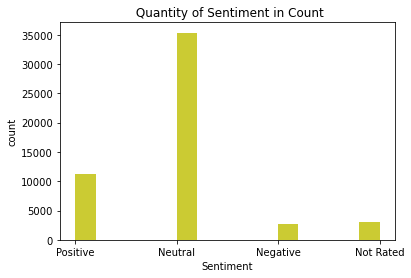

In [27]:
plt.hist(Combine_ALL_new['Sentiment'], bins=15, color='y',alpha=0.8,rwidth=10)
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.title(' Quantity of Sentiment in Count')
plt.show()

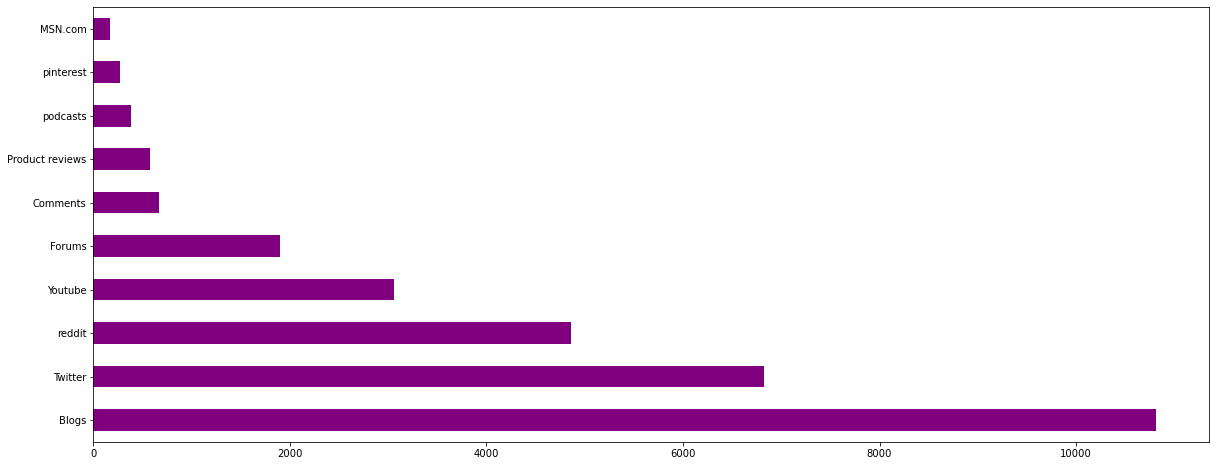

In [28]:
X=Combine_ALL_new.Source.value_counts()
X.head(10).plot(kind='barh',figsize=(20,8),color="purple")
plt.show()

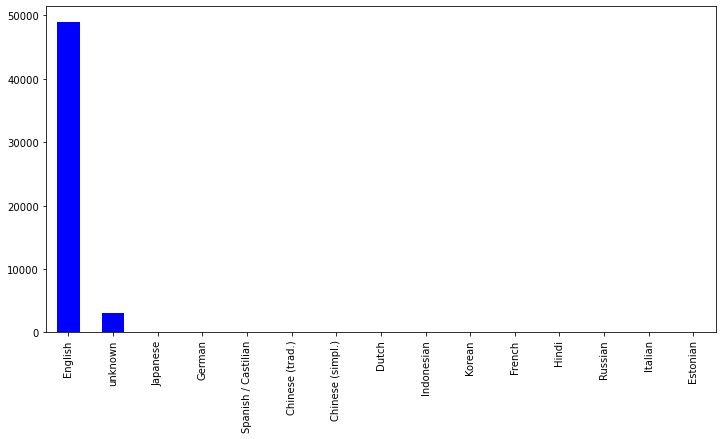

In [29]:
X=Combine_ALL_new.Language.value_counts()
X.head(15).plot(kind='bar',figsize=(12,6),color="b")
plt.show()                                

<AxesSubplot:xlabel='Date', ylabel='Sales'>

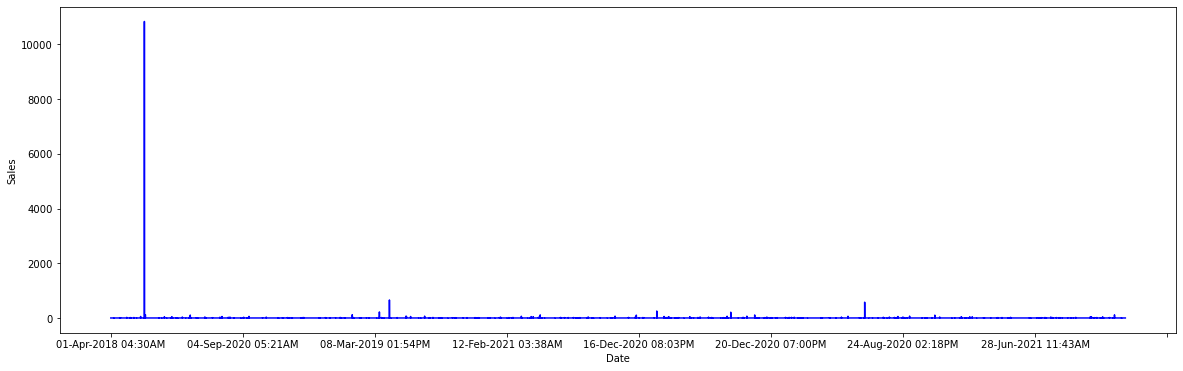

In [30]:
Combine_ALL_new.groupby(['Date']).sum()['Engagement'].plot(kind='line',ylabel='Sales',color='b',figsize=(20,6))

<AxesSubplot:xlabel='Country', ylabel='Reach'>

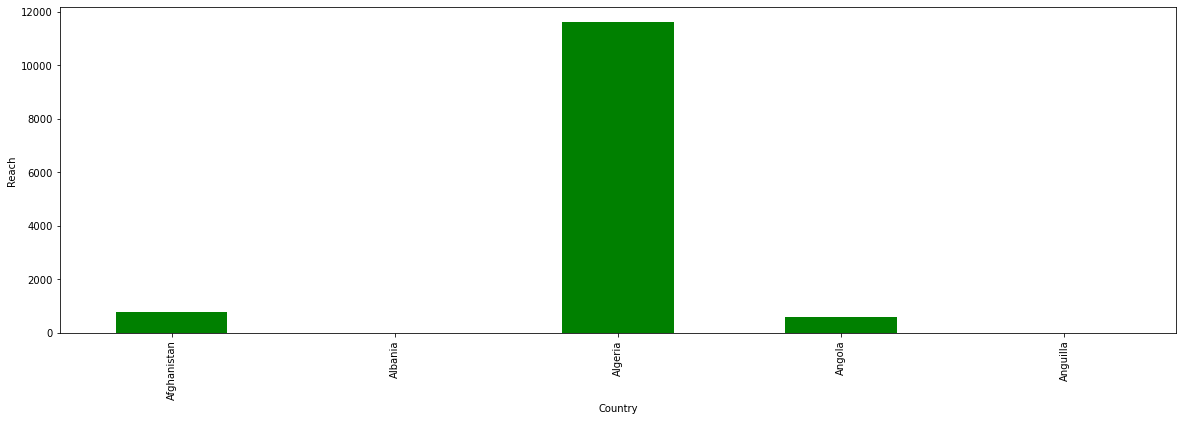

In [31]:
Combine_ALL_new.groupby(['Country']).sum()['Reach'].head(5).plot(kind='bar',ylabel='Reach',color='g',figsize=(20,6))

<AxesSubplot:xlabel='Country', ylabel='Reach'>

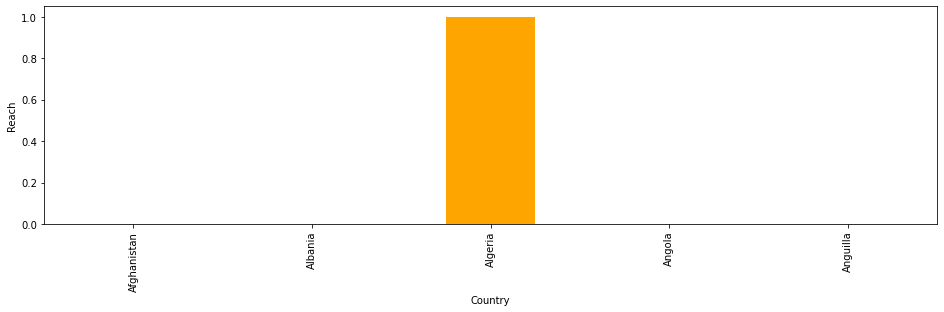

In [32]:
Combine_ALL_new.groupby(['Country']).sum()['Engagement'].head(5).plot(kind='bar',ylabel='Reach',color='orange',figsize=(16,4))

# Stop words are used to save storage space and improve search efficiency. Certain words or words are automatically filtered out when processing text.

In [33]:
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [34]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(Key_Phrases, stem=False):
    # Remove link,user and special characters
    Key_Phrases = re.sub(TEXT_CLEANING_RE, ' ', str(Key_Phrases).lower()).strip()
    tokens = []
    for token in Key_Phrases.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [36]:
%%time
Combine_ALL_new.Key_Phrases = Combine_ALL_new.Key_Phrases.apply(lambda x: preprocess(x))

Wall time: 11 s


In [329]:
Combine_ALL_new.Key_Phrases

0        Heavy metals,heavy levels,powders,tax season,e...
1        plant milks,supplement,enough protein,vegan ch...
2        protein powder,tax season,cyber criminals,high...
3        social media,CBD Marketing,supplements,product...
4        plant milks,enough protein,vegan cheese,animal...
                               ...                        
19995                                                     
19996                                                     
19997    Here the 5 Best Vegan Protein Powder,IMPORTANC...
19998    LOSE FAT BY EATING PLANTS,Sample meal plan,Veg...
19999    milk,cook,enough almond milk,Stir,Method,bowls...
Name: Key_Phrases, Length: 52354, dtype: object

# Spilt trainset and testset

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

TRAIN_SIZE=0.8
df_train, df_test = train_test_split(Combine_ALL_new, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 41883
TEST size: 10471


In [38]:
#%%time
documents = [_Key_Phrases.split() for _Key_Phrases in df_train.Key_Phrases] 

# Word2Vec-find the vector of embedding

In [39]:
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [40]:
w2v_model.build_vocab(documents)

In [41]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

Wall time: 42.5 s


(60998804, 71432640)

# Tokenize Text- data retrieval

In [42]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.Key_Phrases)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 37046
Wall time: 1.85 s


In [43]:
%%time
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.Key_Phrases), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.Key_Phrases), maxlen=SEQUENCE_LENGTH)

Wall time: 1.96 s


In [44]:
labels = df_train.Sentiment.unique().tolist()
labels

['Neutral', 'Positive', 'Negative', 'Not Rated']

In [45]:
encoder = LabelEncoder()
encoder.fit(df_train.Sentiment.tolist())

y_train = encoder.transform(df_train.Sentiment.tolist())
y_test = encoder.transform(df_test.Sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (41883, 1)
y_test (10471, 1)


In [46]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (41883, 300)
y_train (41883, 1)

x_test (10471, 300)
y_test (10471, 1)


In [47]:
y_train[:10]

array([[1],
       [1],
       [1],
       [3],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

# embedding

In [48]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(37046, 300)


In [49]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

# Build model

In [50]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          11113800  
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 11,274,301
Trainable params: 160,501
Non-trainable params: 11,113,800
_________________________________________________________________


In [51]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [52]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [53]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
37/37 [==============================] - 351s 9s/step - loss: -2.3968 - accuracy: 0.6057 - val_loss: -5.5845 - val_accuracy: 0.6784 - lr: 0.0010
Epoch 2/8
37/37 [==============================] - 431s 12s/step - loss: -6.9726 - accuracy: 0.6742 - val_loss: -8.1102 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 3/8
37/37 [==============================] - 458s 12s/step - loss: -9.1979 - accuracy: 0.6757 - val_loss: -10.0052 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 4/8
37/37 [==============================] - 598s 16s/step - loss: -11.0762 - accuracy: 0.6757 - val_loss: -11.7934 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 5/8
37/37 [==============================] - 3075s 84s/step - loss: -12.8719 - accuracy: 0.6757 - val_loss: -13.5189 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 6/8
37/37 [==============================] - 539s 15s/step - loss: -14.6221 - accuracy: 0.6757 - val_loss: -15.2151 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 7/8
37/37 [==============================] - 553s 1

# Evaluate model- use testdet

In [54]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

11/11 [==============================] - 34s 3s/step - loss: -19.2784 - accuracy: 0.6722

ACCURACY: 0.6722376346588135
LOSS: -19.278358459472656
Wall time: 34.5 s


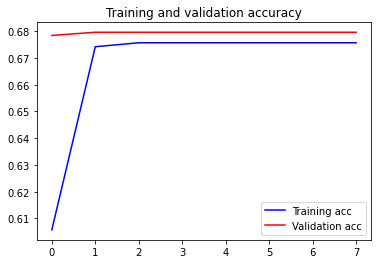

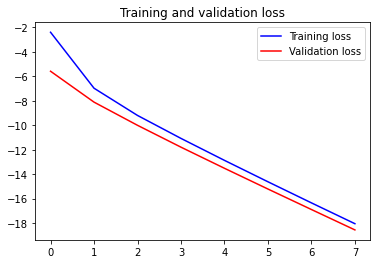

In [55]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
 
plt.show()

In [330]:
%%time
Combine_ALL_new['Hit Sentence'] = Combine_ALL_new['Hit Sentence'].apply(lambda x: preprocess(x))

Wall time: 2.84 s


In [332]:
%%time
Combine_ALL_new['Headline'] = Combine_ALL_new['Headline'].apply(lambda x: preprocess(x))
Combine_ALL_new['Key Phrases'] = Combine_ALL_new['Key_Phrases'].apply(lambda x: preprocess(x))

Wall time: 8.93 s


In [336]:
Combine_ALL_new['Headline'].apply(lambda x: preprocess(x))

0                                       abc7 side year end
1                                   attempt veganuary read
2                                       abc7 side year end
3               premium content dow jones longer available
4               premium content dow jones longer available
                               ...                        
19995      5 best protein powders 2021 best protein powder
19996                                                     
19997    comment revealing 5 best vegan protein powder ...
19998    vegan bodybuilding tips importance stretching ...
19999             5 healthy recipes help de stodge january
Name: Headline, Length: 52354, dtype: object

In [355]:
Combine_ALL_new.loc[(Combine_ALL_new['Hit Sentence']=='purchase') | (Combine_ALL_new['Key_Phrases']=='purchase')]
Combine_ALL_new.loc[(Combine_ALL_new['Headline']=='purchase') | (Combine_ALL_new['Hit Sentence']=='purchase') | (Combine_ALL_new['Key Phrases']=='purchase')]

,Date,Headline,Hit Sentence,Source,Country,Language,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,...,Reddit Social Echo,National Viewership,Engagement,AVE,Sentiment,Key_Phrases,Keywords,State,City,Key Phrases


In [347]:
#words=['purchase','buy', 'getting', 'property', 'marketing', 'acquirement', 'earn', 'sale', 'buying', 'gain', 'obtaining', 'investing']
#col=['Hit Sentence','Key Phrases']
#df3 = Combine_ALL_new[Combine_ALL_new[str('Headline')].apply(lambda x: 'purchase' in x)]
df3 = Combine_ALL_new[Combine_ALL_new['Headline'].apply(lambda x: 'purchase' in x)]
df1=Combine_ALL_new[Combine_ALL_new['Hit Sentence'].apply(lambda x: 'purchase' in x)]
df2=Combine_ALL_new[Combine_ALL_new['Key_Phrases'].apply(lambda x: 'purchase' in x)]

In [348]:
df_purchase = pd.concat([df1,df2,df3], axis=0, ignore_index=True)

In [349]:
df_purchase=df_purchase.drop_duplicates()

In [353]:
df_purchase=df_purchase[['Headline','Hit Sentence','Key_Phrases']]
#df_purchase=df_purchase[['Key_Phrases','Hit Sentence']]

In [354]:
df_purchase

,Headline,Hit Sentence,Key_Phrases
0,10 meal replacement products cooking much,12 pack single purchase n7 n n n plant based p...,"meal replacement products,Promising review,pro..."
1,tried sakara new 10 day reset made totally ret...,detox teas daily probiotics latest offering pl...,"delivery service Sakara Life’s brand,trendy me..."
2,plant based phenomenon growing,launch powders shortly 2 3s rtd buyers also pu...,"key plant protein source,plant,protein,proper ..."
3,try,covered purchase products plant based protein ...,"products,skin care products,work,Greens help,S..."
4,new study protein powders clean label project ...,purchased store shelf online 134 top selling p...,"protein powders,Clean Label Project,heavy meta..."
...,...,...,...
409,cleanest protein powders purchase,constructing course within physique n n n n n ...,"Bare peas,Important important grass,John's kil..."
410,cleanest protein powders purchase,subpar choices marketplace n n n n nwhat makes...,"John’s Killer Protein hones,Momentous Importan..."
411,purchase online protein powder,vegan powders please take look particular pers...,"Hemp protein powder,acids,athletes,body,dietar..."
412,dealdrop com facilitates people purchase prote...,easily get dairy based plant based protein pow...,"advantage of discounts,affordable prices,avail..."
